In [79]:
import pandas as pd
import xgi
import numpy as np

In [80]:
#Read in CSV file with coding
df = pd.read_csv("Final Coding.csv",keep_default_na=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    1129 non-null   int64 
 1   tweet_id                      1129 non-null   int64 
 2   user_username                 1129 non-null   object
 3   text                          1129 non-null   object
 4   created_at                    1129 non-null   object
 5   conversation_id               1129 non-null   int64 
 6   lang                          1129 non-null   object
 7   possibly_sensitive            1129 non-null   bool  
 8   author_id                     1129 non-null   int64 
 9   source                        1129 non-null   object
 10  in_reply_to_user_id           1129 non-null   object
 11  user_verified                 1129 non-null   bool  
 12  user_profile_image_url        1129 non-null   object
 13  user_name         

In [81]:
#The codes were in 5 different columns; lets aggregate them into a new column
df["all codes"] = df[["SO code","BC code","BtC code","CCM code","SJEDI code"]].agg(';'.join,axis=1)
#We separated them by ;, so convert to an array 
df["all codes"] = df["all codes"].apply(lambda s: s.split(';'))
#Strip out leading/trailing spaces
df["all codes"] = df["all codes"].apply(lambda s: [t.strip() for t in s if t])
#Sort the arrays, so we can be confident the same things are not listed in two different ways
df["all codes"] = df["all codes"].apply(sorted)
#Convert back to string with ; between the codes
df["all codes"] = df["all codes"].apply(lambda s: ';'.join(s))

#We need to make a list of tuples with the first n-1 entries being the codes, and the last one being the weight
#First, make a dictionary with the codes and their weights
weighted_codes = df["all codes"].value_counts().to_dict()

#Now iterate through the dictionary and create a list of tuples
weighted_edge_list_formatted=[]
for el in list(weighted_codes.items()):
    weighted_edge_list_formatted.append(tuple(el[0].split(';'))+(el[1],))     #el[1] is an integer, (el[1],) makes it into a 1-tuple

#Display the first 10 weighted edges
print(weighted_edge_list_formatted[0:10])

[('advocacy', 'amplification', 'emotional support', 'gender', 'indigenous', 'jmm experience', 'representation', 86), ('amplification', 'bipoc', 'hashtags', 'influencers', 'power', 'talk support', 47), ('humanize', 'math practice', 36), ('amplification', 'influencers', 'representation', 'talk support', 30), ('bipoc', 'current events', 'power', 'talk support', 22), ('amplification', 21), ('amplification', 'lgbtq', 'talk support', 19), ('amplification', 'hashtags', 'influencers', 'math practice', 'talk support', 19), ('amplification', 'humanize', 'influencers', 'talk support', 19), ('hashtags', 'representation', 'strategic planning', 19)]


In [82]:
H = xgi.Hypergraph()
H.add_weighted_edges_from(weighted_edge_list_formatted)

In [83]:
print(H)

Unnamed Hypergraph with 35 nodes and 216 hyperedges


<Axes: >

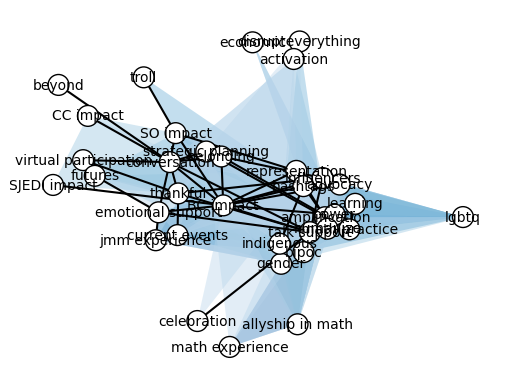

In [84]:
xgi.draw(H,node_labels=True)

In [85]:
dict(sorted(xgi.clique_eigenvector_centrality(H).items(), key=lambda item: -1*item[1])) 

{'amplification': 0.12780472140446733,
 'talk support': 0.11891958807603749,
 'hashtags': 0.11089739075846876,
 'influencers': 0.09776852372642489,
 'power': 0.05743041122442992,
 'representation': 0.052099185784183,
 'humanize': 0.04317917119904657,
 'bipoc': 0.04162943009019716,
 'math practice': 0.04005385041270168,
 'indigenous': 0.0388027470307918,
 'gender': 0.03375840995906262,
 'advocacy': 0.03255185258402353,
 'BC impact': 0.028036225390716166,
 'strategic planning': 0.019217754257627832,
 'thankful': 0.018086498899867704,
 'lgbtq': 0.017394594207099087,
 'current events': 0.016656131249390364,
 'conversation': 0.015465542227332875,
 'allyship in math': 0.014182471559075552,
 'learning': 0.014090465456723029,
 'emotional support': 0.010028752800436606,
 'jmm experience': 0.009830956576335526,
 'belonging': 0.009756303471298461,
 'SO impact': 0.00854879811163832,
 'math experience': 0.004448163056753393,
 'economic': 0.00427954037514743,
 'disrupteverything': 0.0033933086584511

In [86]:
kc=xgi.katz_centrality(H,index=True)
d={ item[1]:kc[0][item[0]] for item in kc[1].items()}
dict(sorted(d.items(),key=lambda item: -1*item[1]))

{'amplification': 8.314285750218966,
 'talk support': 7.571428605260526,
 'hashtags': 7.257142888471052,
 'influencers': 5.800000028196622,
 'power': 3.3428571593066274,
 'representation': 3.171428586390436,
 'bipoc': 2.4571428690388406,
 'indigenous': 2.3714285826002848,
 'humanize': 2.257142869437977,
 'math practice': 2.1714285828206417,
 'gender': 2.171428581093537,
 'advocacy': 2.057142866388728,
 'BC impact': 2.0285714365882863,
 'conversation': 1.485714290260304,
 'strategic planning': 1.4000000057018558,
 'thankful': 1.3428571481124634,
 'current events': 1.1714285762090835,
 'lgbtq': 0.9142857192009355,
 'emotional support': 0.8571428600939854,
 'SO impact': 0.8285714311084511,
 'allyship in math': 0.7714285755230645,
 'learning': 0.7714285754540467,
 'belonging': 0.6857142885548194,
 'jmm experience': 0.6857142885539877,
 'futures': 0.34285714370198545,
 'math experience': 0.314285715571272,
 'activation': 0.20000000050224895,
 'economic': 0.17142857265093234,
 'disrupteveryt

## In periods of time

In [87]:
#filtering the dataset by year
df2019 = df[df['created_at'].str.contains("2019-")].copy()
df2020 = df[df['created_at'].str.contains("2020-")].copy()
df2021 = df[df['created_at'].str.contains("2021-")].copy()

In [88]:
#using Drew's code to create a function for our hypergraphs

def create_twitter_hypergraph(df):
    """Given a dataframe with our disruptJMM coding information attached as in Final Coding.csv, create the hypergraph of codes"""
    #The codes were in 5 different columns; lets aggregate them into a new column
    df["all codes"] = df[["SO code","BC code","BtC code","CCM code","SJEDI code"]].agg(';'.join,axis=1)
    #We separated them by ;, so convert to an array 
    df["all codes"] = df["all codes"].apply(lambda s: s.split(';'))
    #Strip out leading/trailing spaces
    df["all codes"] = df["all codes"].apply(lambda s: [t.strip() for t in s if t])
    #Sort the arrays, so we can be confident the same things are not listed in two different ways
    df["all codes"] = df["all codes"].apply(sorted)
    #Convert back to string with ; between the codes
    df["all codes"] = df["all codes"].apply(lambda s: ';'.join(s))

    #We need to make a list of tuples with the first n-1 entries being the codes, and the last one being the weight
    #First, make a dictionary with the codes and their weights
    weighted_codes = df["all codes"].value_counts().to_dict()

    #Now iterate through the dictionary and create a list of tuples
    weighted_edge_list_formatted=[]
    for el in list(weighted_codes.items()):
        weighted_edge_list_formatted.append(tuple(el[0].split(';'))+(el[1],))    #el[1] is an integer, (el[1],) makes it into a 1-tuple
    H = xgi.Hypergraph()
    H.add_weighted_edges_from(weighted_edge_list_formatted)
    return H

In [89]:
H2019 = create_twitter_hypergraph(df2019)
H2020 = create_twitter_hypergraph(df2020)
H2021 = create_twitter_hypergraph(df2021)




{'amplification': 2,
 'hashtags': 2,
 'humanize': 1,
 'influencers': 1,
 'representation': 1,
 'strategic planning': 1,
 'BC impact': 1,
 'conversation': 2}

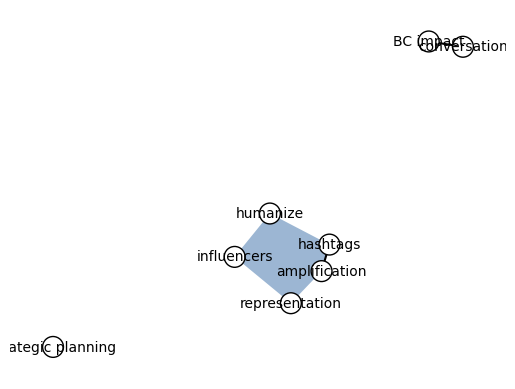

In [90]:
xgi.draw(H2019,node_labels=True)
H2019.nodes.degree.asdict()


<Axes: >

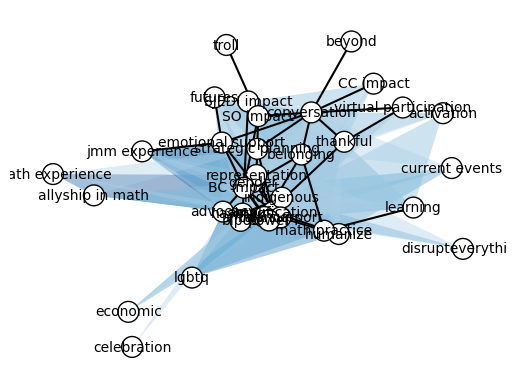

In [91]:
xgi.draw(H2020,node_labels=True)

<Axes: >

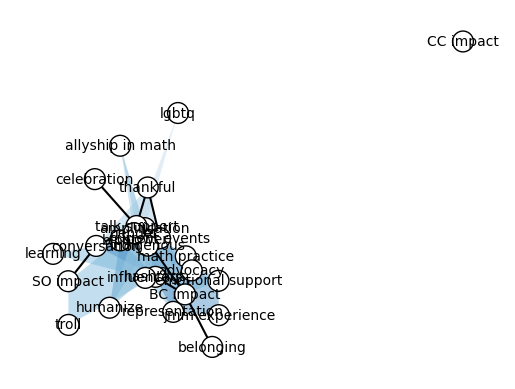

In [92]:
xgi.draw(H2021,node_labels=True)

In [93]:
code_df= pd.read_csv("Code Book.csv")
code_df


,self organization,building community,broadening the counterpublic,creating change in math,SJEDI
0,amplification,thankful,disrupteverything,humanize,representation
1,activation,talk support,influencers,jmm experience,lgbtq
2,strategic planning,belonging,beyond,math experience,bipoc
3,SO impact,emotional support,hashtags,futures,gender
4,troll,expertise support,virtual participation,math practice,indigenous
5,NaN,conversation,NaN,current events,power
6,NaN,celebration,NaN,allyship in math,advocacy
7,NaN,BC impact,NaN,CC impact,learning
8,NaN,NaN,NaN,NaN,economic
9,NaN,NaN,NaN,NaN,SJEDI impact


In [94]:
#dictionary color coding the themes
code_dict = {'self organization': 'red', 'building community':'yellow', 'broadening the counterpublic':'green', 'creating change in math': 'blue', 'SJEDI':'purple' }

array(['amplification', 'activation', 'strategic planning', 'SO impact',
       'troll', 'thankful', 'talk support', 'belonging',
       'emotional support', 'expertise support', 'conversation',
       'celebration', 'BC impact', 'disrupteverything', 'influencers',
       'beyond', 'hashtags', 'virtual participation', 'humanize',
       'jmm experience', 'math experience', 'futures', 'math practice',
       'current events', 'allyship in math', 'CC impact',
       'representation', 'lgbtq', 'bipoc', 'gender', 'indigenous',
       'power', 'advocacy', 'learning', 'economic', 'SJEDI impact'],
      dtype='<U21')

In [97]:
H.nodes

NodeView(('advocacy', 'amplification', 'emotional support', 'gender', 'indigenous', 'jmm experience', 'representation', 'bipoc', 'hashtags', 'influencers', 'power', 'talk support', 'humanize', 'math practice', 'current events', 'lgbtq', 'strategic planning', 'allyship in math', 'math experience', 'conversation', 'thankful', 'BC impact', 'disrupteverything', 'SJEDI impact', 'SO impact', 'belonging', 'learning', 'troll', 'CC impact', 'virtual participation', 'activation', 'futures', 'economic', 'beyond', 'celebration'))

In [107]:
#for each node in the hypergraph, find what theme it exists in and give it a color
color_dict = {n: code_dict[np.array(code_df.columns[code_df.isin([n]).any()])[0]] for n in H.nodes}
color_dict

{'advocacy': 'purple',
 'amplification': 'red',
 'emotional support': 'yellow',
 'gender': 'purple',
 'indigenous': 'purple',
 'jmm experience': 'blue',
 'representation': 'purple',
 'bipoc': 'purple',
 'hashtags': 'green',
 'influencers': 'green',
 'power': 'purple',
 'talk support': 'yellow',
 'humanize': 'blue',
 'math practice': 'blue',
 'current events': 'blue',
 'lgbtq': 'purple',
 'strategic planning': 'red',
 'allyship in math': 'blue',
 'math experience': 'blue',
 'conversation': 'yellow',
 'thankful': 'yellow',
 'BC impact': 'yellow',
 'disrupteverything': 'green',
 'SJEDI impact': 'purple',
 'SO impact': 'red',
 'belonging': 'yellow',
 'learning': 'purple',
 'troll': 'red',
 'CC impact': 'blue',
 'virtual participation': 'green',
 'activation': 'red',
 'futures': 'blue',
 'economic': 'purple',
 'beyond': 'green',
 'celebration': 'yellow'}

{'amplification': 2,
 'hashtags': 2,
 'humanize': 1,
 'influencers': 1,
 'representation': 1,
 'strategic planning': 1,
 'BC impact': 1,
 'conversation': 2}

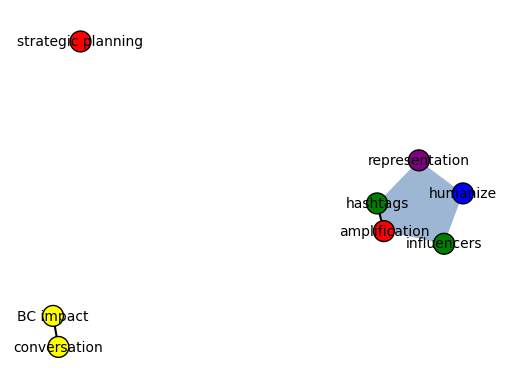

In [144]:
xgi.draw(H2019,node_labels=True,node_fc= color_dict)
H2019.nodes.degree.asdict()

{'advocacy': 17,
 'amplification': 78,
 'emotional support': 11,
 'gender': 15,
 'indigenous': 14,
 'jmm experience': 7,
 'representation': 30,
 'humanize': 21,
 'math practice': 21,
 'influencers': 53,
 'talk support': 63,
 'hashtags': 70,
 'strategic planning': 20,
 'lgbtq': 9,
 'conversation': 20,
 'allyship in math': 6,
 'math experience': 3,
 'thankful': 19,
 'BC impact': 28,
 'power': 25,
 'current events': 3,
 'disrupteverything': 3,
 'bipoc': 14,
 'SJEDI impact': 2,
 'learning': 9,
 'SO impact': 12,
 'belonging': 12,
 'activation': 4,
 'CC impact': 3,
 'virtual participation': 4,
 'futures': 5,
 'troll': 1,
 'economic': 2,
 'beyond': 1,
 'celebration': 1}

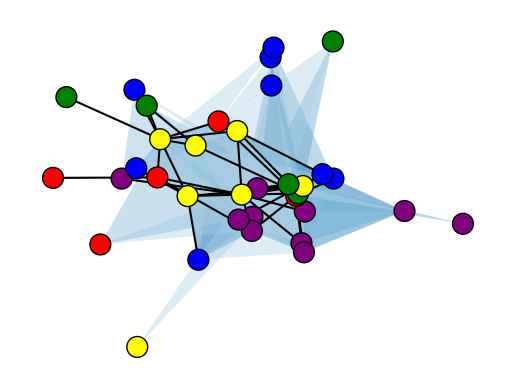

In [180]:
xgi.draw(H2020,node_labels=False, node_fc= color_dict,)
H2020.nodes.degree.asdict()

<Axes: >

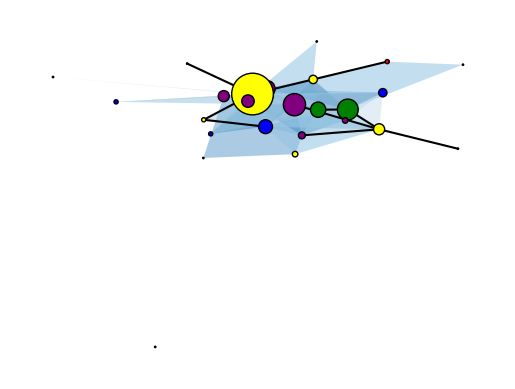

In [178]:
xgi.draw(H2021,node_labels=False,node_fc= color_dict, node_size= H2021.nodes.degree.asdict())


In [168]:
temp = H.nodes.degree.asdict()
H_node_size = {n: temp[n]/4 for n in temp.keys()}
H_node_size

{'advocacy': 5.0,
 'amplification': 22.5,
 'emotional support': 3.5,
 'gender': 5.25,
 'indigenous': 5.25,
 'jmm experience': 1.75,
 'representation': 8.5,
 'bipoc': 6.25,
 'hashtags': 20.0,
 'influencers': 15.25,
 'power': 9.0,
 'talk support': 21.0,
 'humanize': 5.75,
 'math practice': 6.25,
 'current events': 3.25,
 'lgbtq': 2.25,
 'strategic planning': 5.0,
 'allyship in math': 2.0,
 'math experience': 0.75,
 'conversation': 6.25,
 'thankful': 5.5,
 'BC impact': 8.25,
 'disrupteverything': 0.75,
 'SJEDI impact': 0.5,
 'SO impact': 3.25,
 'belonging': 3.0,
 'learning': 2.5,
 'troll': 0.5,
 'CC impact': 1.0,
 'virtual participation': 1.0,
 'activation': 1.0,
 'futures': 1.25,
 'economic': 0.5,
 'beyond': 0.25,
 'celebration': 0.5}

<Axes: >

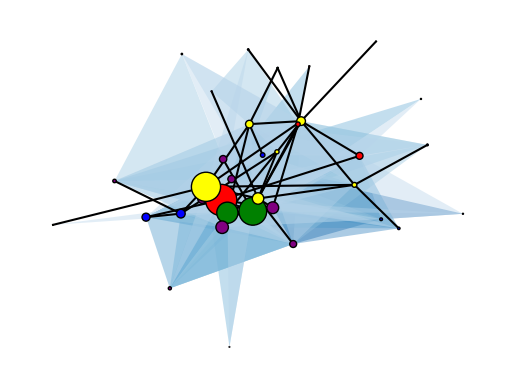

In [179]:
xgi.draw(H, node_fc= color_dict, node_size = H_node_size)

In [158]:
H.edges.attrs.asdict()

{0: {'weight': 86},
 1: {'weight': 47},
 2: {'weight': 36},
 3: {'weight': 30},
 4: {'weight': 22},
 5: {'weight': 21},
 6: {'weight': 19},
 7: {'weight': 19},
 8: {'weight': 19},
 9: {'weight': 19},
 10: {'weight': 15},
 11: {'weight': 14},
 12: {'weight': 14},
 13: {'weight': 14},
 14: {'weight': 13},
 15: {'weight': 12},
 16: {'weight': 11},
 17: {'weight': 11},
 18: {'weight': 11},
 19: {'weight': 11},
 20: {'weight': 11},
 21: {'weight': 11},
 22: {'weight': 10},
 23: {'weight': 10},
 24: {'weight': 10},
 25: {'weight': 10},
 26: {'weight': 10},
 27: {'weight': 10},
 28: {'weight': 9},
 29: {'weight': 9},
 30: {'weight': 9},
 31: {'weight': 9},
 32: {'weight': 9},
 33: {'weight': 9},
 34: {'weight': 9},
 35: {'weight': 8},
 36: {'weight': 8},
 37: {'weight': 8},
 38: {'weight': 7},
 39: {'weight': 7},
 40: {'weight': 7},
 41: {'weight': 7},
 42: {'weight': 7},
 43: {'weight': 7},
 44: {'weight': 6},
 45: {'weight': 6},
 46: {'weight': 6},
 47: {'weight': 6},
 48: {'weight': 6},
 4